In [1]:
import matplotlib.pyplot as plt
import numpy
import scipy

from metricdiversity.model.multi_gaussian_process import MultiOutputGP
from metricdiversity.acquisitions.expected_metric_coverage import ExpectedMetricCoverage

# Two Dimensions, Two Objectives

We first start with a small toy example, in which we learn a multioutput GP using a few training points

In [2]:
# define objective 
def yf2d(x):
    v1 = numpy.exp(-2 * (x[:, 0] - 0.3) ** 2 - 4 * (x[:, 1] - 0.6) ** 2)
    v2 = numpy.exp(-3 * (x[:, 0] - 0.1) ** 2 - 3 * (x[:, 1] - 0.1) ** 2)
    return numpy.stack((v1, v2)).T


# Select a few observations at random
numpy.random.seed(1234)
Xtrain = numpy.random.rand(6, 2)
Ytrain = yf2d(Xtrain)
gpm = MultiOutputGP(Xtrain, Ytrain)

Next, we use the GP to predict a set of unseen values spread out on a grid. We keep the colors of parameters and their corresponding metrics consistent to make things clear

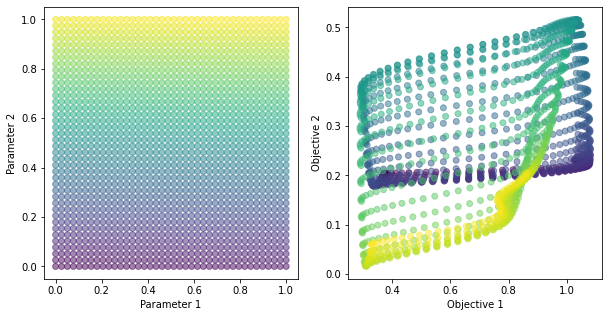

In [3]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))

d = 2
N1, N2 = 40, 40
Xplt, Yplt = numpy.meshgrid(numpy.linspace(0, 1, N1), numpy.linspace(0, 1, N2))
X = numpy.stack((Xplt.flatten(), Yplt.flatten())).T
Y = gpm.predict(X)


t = numpy.arange(N1*N2)
axes[0].set_xlabel('Parameter 1')
axes[0].set_ylabel('Parameter 2')
axes[0].scatter(X[:, 0], X[:, 1], c=t, alpha=0.5)

axes[1].set_xlabel('Objective 1')
axes[1].set_ylabel('Objective 2')
axes[1].scatter(Y[:, 0], Y[:, 1], c=t, alpha=0.5)



# Computing and visualizing the utility function

We select our metric thresholds to be:

0.1 < y1, y2 < 0.9

And our punchout radius to be 0.2. Having defined these, we compute the expected metric coverage utility function, and instead shade the parameter and metric values based on the value of this utility function. We see that this utility function appears to function as intended.

In [6]:
ub = [0.9, 0.9]
lb = [0.1, 0.1]
punchout_radius = 0.2
emc = ExpectedMetricCoverage(gpm, ub, lb, punchout_radius)
values = []
for i in range(N1*N2):
    x = X[i, :]
    values.append(emc.compute_expected_utility(x))


277
[0.62085396 0.76130393]


[]

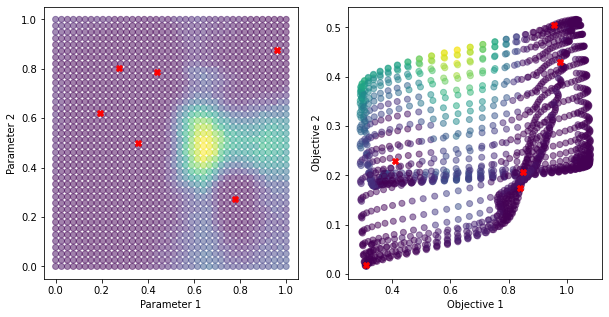

In [7]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))

axes[0].set_xlabel('Parameter 1')
axes[0].set_ylabel('Parameter 2')
axes[0].scatter(X[:, 0], X[:, 1], c=values, alpha=0.5)
axes[0].scatter(Xtrain[:, 0], Xtrain[:, 1], marker='X', color='r')

axes[1].set_xlabel('Objective 1')
axes[1].set_ylabel('Objective 2')
axes[1].scatter(Y[:, 0], Y[:, 1], c=values, alpha=0.5)
cmap = axes[1].scatter(Ytrain[:, 0], Ytrain[:, 1], marker='X', color='r')

xnext = emc.get_suggestion()
print(xnext)

axes[1].plot()

# fig.colorbar(cmap)

